# 1. Introduction

This document aims to perform an initial exploration of the Exempt Organizations Business Master File (EO BMF) features and values to identify relevant variables for a detailed analysis of philanthropic giving within the environmental and social justice sectors. Additionally, we intend to assess the level of transparency and accountability of various organizations, leveraging the data provided by the EO BMF Extract to inform our inquiry.

The EO BMF Extract provides information about an organization from the Internal Revenue Service's Business Master File. This is a cumulative file, and the data are the most recent information the IRS has for these organizations. Because the EO BMF is separated into csvs by regions, the csv used for this page's analysis is specfic to the Northeast, inclusive of Connecticut, Maine, Massachusetts, New Hampshire, New Jersey, New York, Rhode Island, Vermont. In the future, a page will be created for a deeper analysis on all regions, but for now, this is just to get familiar with the data fields. Futher information can be found on IRS.gov - https://www.irs.gov/charities-non-profits/exempt-organizations-business-master-file-extract-eo-bmf


# 2. First Glance

## 2.1. General Summary

In [2]:
# Libraries for data manipulation.
import pandas as pd
import numpy as np

# Libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Libraries for quarto rending
from IPython.display import Markdown,display
from tabulate import tabulate
import plotly.io as pio

# Remove warnings.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Read in data.
df_reg_giv_irs_eo1 = pd.read_csv('../../data/Regional Giving Data IRS eo1.csv')

# Print data dimensions.
shape_caption = "Data Dimensions:"
shape_df = pd.DataFrame({
        'Dimension': ['Rows','Columns'],
        'Count': [df_reg_giv_irs_eo1.shape[0], df_reg_giv_irs_eo1.shape[1]]
    })
shape_df['Count'] = shape_df['Count'].apply(lambda x: f"{x:,}")
shape_markdown = shape_caption + "\n\n" + shape_df.to_markdown(index=False)
display(Markdown(shape_markdown))

# Print a sample of the data.
first_five_rows_caption = "First Five Rows of Data:"
first_five_rows_markdown = first_five_rows_caption + "\n\n" + df_reg_giv_irs_eo1.head().to_markdown(index=False)
display(Markdown(first_five_rows_markdown))

# Print metadata.
metadata_caption = "Metadata:"
column_metadata = []

for col in df_reg_giv_irs_eo1.columns:
    # Gather metadata for each col.
    col_metadata = {
        'Column Name': col,
        'Data Type': str(df_reg_giv_irs_eo1[col].dtype),
        'Unique Values': df_reg_giv_irs_eo1[col].nunique(),
        'Missing Values': df_reg_giv_irs_eo1[col].isnull().sum()
    }
    # Append metadata to list.
    column_metadata.append(col_metadata)

# Convert list to pd df and then markdown table.
metadata_df = pd.DataFrame(column_metadata)
metadata_df['Unique Values'] = metadata_df['Unique Values'].apply(lambda x: f"{x:,}")
metadata_df['Missing Values'] = metadata_df['Missing Values'].apply(lambda x: f"{x:,}")
metadata_markdown = metadata_caption + "\n\n" + metadata_df.to_markdown(index=False)
display(Markdown(metadata_markdown))

Data Dimensions:

| Dimension   | Count   |
|:------------|:--------|
| Rows        | 267,136 |
| Columns     | 28      |

First Five Rows of Data:

|    EIN | NAME                                             |   ICO | STREET                       | CITY         | STATE   | ZIP        |   GROUP |   SUBSECTION |   AFFILIATION |   CLASSIFICATION |   RULING |   DEDUCTIBILITY |   FOUNDATION |   ACTIVITY |   ORGANIZATION |   STATUS |   TAX_PERIOD |   ASSET_CD |   INCOME_CD |   FILING_REQ_CD |   PF_FILING_REQ_CD |   ACCT_PD |   ASSET_AMT |   INCOME_AMT |   REVENUE_AMT | NTEE_CD   |   SORT_NAME |
|-------:|:-------------------------------------------------|------:|:-----------------------------|:-------------|:--------|:-----------|--------:|-------------:|--------------:|-----------------:|---------:|----------------:|-------------:|-----------:|---------------:|---------:|-------------:|-----------:|------------:|----------------:|-------------------:|----------:|------------:|-------------:|--------------:|:----------|------------:|
|  19818 | PALMER SECOND BAPTIST CHURCH                     |   nan | 1050 THORNDIKE ST            | PALMER       | MA      | 01069-1507 |    3125 |            3 |             9 |             7000 |   195504 |               1 |           10 |    1000000 |              5 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | nan       |        3514 |
|  29215 | ST GEORGE CATHEDRAL                              |   nan | 523 E BROADWAY               | SOUTH BOSTON | MA      | 02127-4415 |    2365 |            3 |             9 |             7000 |   197210 |               1 |           10 |    1000000 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | nan       |         nan |
| 587764 | IGLESIA BETHESDA INC                             |   nan | 13 CUMMINGHAM ST             | LOWELL       | MA      | 01852-0000 |       0 |            3 |             3 |             7000 |   200401 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 635913 | MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC |   nan | 454 ESSEX ST                 | LAWRENCE     | MA      | 01840-1242 |       0 |            3 |             3 |             7000 |   200401 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 765634 | MERCY CHAPEL INTERNATIONAL                       |   nan | 75 MORTON VILLAGE DR APT 408 | MATTAPAN     | MA      | 02126-2433 |       0 |            3 |             3 |             7000 |   200404 |               1 |           10 |          0 |              1 |        1 |          nan |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X20       |         nan |

Metadata:

| Column Name      | Data Type   | Unique Values   | Missing Values   |
|:-----------------|:------------|:----------------|:-----------------|
| EIN              | int64       | 267,136         | 0                |
| NAME             | object      | 230,144         | 0                |
| ICO              | object      | 150,373         | 97,108           |
| STREET           | object      | 182,953         | 0                |
| CITY             | object      | 4,766           | 0                |
| STATE            | object      | 8               | 0                |
| ZIP              | object      | 196,389         | 0                |
| GROUP            | int64       | 1,516           | 0                |
| SUBSECTION       | int64       | 28              | 0                |
| AFFILIATION      | int64       | 8               | 0                |
| CLASSIFICATION   | int64       | 146             | 0                |
| RULING           | int64       | 1,241           | 0                |
| DEDUCTIBILITY    | int64       | 4               | 0                |
| FOUNDATION       | int64       | 20              | 0                |
| ACTIVITY         | int64       | 9,955           | 0                |
| ORGANIZATION     | int64       | 7               | 0                |
| STATUS           | int64       | 4               | 0                |
| TAX_PERIOD       | float64     | 211             | 50,071           |
| ASSET_CD         | int64       | 10              | 0                |
| INCOME_CD        | int64       | 10              | 0                |
| FILING_REQ_CD    | int64       | 8               | 0                |
| PF_FILING_REQ_CD | int64       | 4               | 0                |
| ACCT_PD          | int64       | 13              | 0                |
| ASSET_AMT        | float64     | 104,745         | 52,430           |
| INCOME_AMT       | float64     | 99,571          | 52,430           |
| REVENUE_AMT      | float64     | 82,077          | 76,224           |
| NTEE_CD          | object      | 2,938           | 80,923           |
| SORT_NAME        | object      | 51,987          | 212,833          |

## 2.2. Statistical Summary

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
stat_sum_caption = "Statistical Summary:"

formatted_df = df_reg_giv_irs_eo1.describe().copy()
for col in formatted_df.select_dtypes(include=['float64', 'float32']).columns:
    formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:,.2f}")

stat_sum_markdown = stat_sum_caption + "\n\n" + formatted_df.to_markdown(index=False)
#display(Markdown(stat_sum_markdown))

# 3. Data Preparation

In this section, we detail the initial steps taken to prepare the Regional Giving Data from the IRS for analysis. Our goals are to ensure consistency in column naming, handle missing values appropriately, and convert data into formats that are suitable for our analytical needs. Please click the drop down arrow for more details on code used to achieve this.


In [4]:
# Standardize column names.
df_reg_giv_irs_eo1.columns = [x.lower() for x in df_reg_giv_irs_eo1.columns]

# Replace zeros with NaN for appropriate columns.
df_reg_giv_irs_eo1['ruling'] = df_reg_giv_irs_eo1['ruling'].replace(0, np.nan)

# Replace NaN with appropriate values accordingly.
df_reg_giv_irs_eo1['ntee_cd'].fillna('Z', inplace=True) # Z stands for unknown according to data documentation.

# Convert columns to appropriate data types.
date_cols = ['ruling','tax_period']
for col in date_cols:
    df_reg_giv_irs_eo1[col] = df_reg_giv_irs_eo1[col].astype(str).str.replace('\.0$', '', regex=True)
    df_reg_giv_irs_eo1[col] = pd.to_datetime(df_reg_giv_irs_eo1[col], format='%Y%m', errors='coerce')

# Show cleaned data.
head_caption = "Cleaned data sample view:"
head_df = df_reg_giv_irs_eo1.head().copy()
head_markdown = head_caption + "\n\n" + head_df.to_markdown(index=False)
display(Markdown(head_markdown))

Cleaned data sample view:

|    ein | name                                             |   ico | street                       | city         | state   | zip        |   group |   subsection |   affiliation |   classification | ruling              |   deductibility |   foundation |   activity |   organization |   status | tax_period   |   asset_cd |   income_cd |   filing_req_cd |   pf_filing_req_cd |   acct_pd |   asset_amt |   income_amt |   revenue_amt | ntee_cd   |   sort_name |
|-------:|:-------------------------------------------------|------:|:-----------------------------|:-------------|:--------|:-----------|--------:|-------------:|--------------:|-----------------:|:--------------------|----------------:|-------------:|-----------:|---------------:|---------:|:-------------|-----------:|------------:|----------------:|-------------------:|----------:|------------:|-------------:|--------------:|:----------|------------:|
|  19818 | PALMER SECOND BAPTIST CHURCH                     |   nan | 1050 THORNDIKE ST            | PALMER       | MA      | 01069-1507 |    3125 |            3 |             9 |             7000 | 1955-04-01 00:00:00 |               1 |           10 |    1000000 |              5 |        1 | NaT          |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | Z         |        3514 |
|  29215 | ST GEORGE CATHEDRAL                              |   nan | 523 E BROADWAY               | SOUTH BOSTON | MA      | 02127-4415 |    2365 |            3 |             9 |             7000 | 1972-10-01 00:00:00 |               1 |           10 |    1000000 |              1 |        1 | NaT          |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | Z         |         nan |
| 587764 | IGLESIA BETHESDA INC                             |   nan | 13 CUMMINGHAM ST             | LOWELL       | MA      | 01852-0000 |       0 |            3 |             3 |             7000 | 2004-01-01 00:00:00 |               1 |           10 |          0 |              1 |        1 | NaT          |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 635913 | MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC |   nan | 454 ESSEX ST                 | LAWRENCE     | MA      | 01840-1242 |       0 |            3 |             3 |             7000 | 2004-01-01 00:00:00 |               1 |           10 |          0 |              1 |        1 | NaT          |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X21       |         nan |
| 765634 | MERCY CHAPEL INTERNATIONAL                       |   nan | 75 MORTON VILLAGE DR APT 408 | MATTAPAN     | MA      | 02126-2433 |       0 |            3 |             3 |             7000 | 2004-04-01 00:00:00 |               1 |           10 |          0 |              1 |        1 | NaT          |          0 |           0 |               6 |                  0 |        12 |         nan |          nan |           nan | X20       |         nan |

# 4. Analysis
Objective: Determine if the Exempt Organization Business Master File can be used to conduct a comprehensive analysis of existing philanthropic giving in environmental and social justice. Additionally, can it be used to assess the level of transparency and accountability in current giving practices?


## 4.1. Indentifying Relevant Organizations
The EO BMF can be filtered to reflect organizations by their codes (reflecting their primary mission), enabling the identification of nonprofits focused on environmental protection, social justice, advocacy, and related activities. This step is crucial for creating a focused dataset of relevant organizations for our objective above.

**Action item**: Review with team to determine which column makes the most sense to use to filter relevant orgs. Options include:
* Subection and Classification codes.
* National Taxonomy of Exempt Entities (NTEE) codes (many are missing unfortunately).
* Foundation codes.
* Activity codes (most likely not useful since becoming obsolete with the adoption of the NTEE coding system in January 1995).

### 4.1.1. Using Subsection & Classification Codes


Subsection Codes are the codes shown under section 501(c) of the Internal Revenue Code of 1986, which define the
category under which an organization may be exempt. A table of subsection and classification codes (which reflects a
further breakdown of the Internal Revenue Code subsections) can be found in the section entitled "Table of EO Subsection and Classification Codes" (below). One to four different classification codes may be present. - https://www.irs.gov/pub/irs-soi/eo-info.pdf

**Action Item**: CLASSIFICATION field is not clear. Confirm if 7000 should be interpreted as 7. Some fields not in CLASSIFICIATION code documentation such as 9510 (there is no 9 classification code - it only goes up to 8 in the documentation).

**Action Item**: If this methodology is chosen to filter the dataset organizations, which codes should be used?

In [5]:
display(Markdown(f"Ex. of subsection and classifiation data for various EINs:"))

df_reg_giv_irs_eo1[['ein','subsection','classification']].tail(5)
df_reg_giv_irs_eo1[['ein','subsection','classification']].head(5)

Ex. of subsection and classifiation data for various EINs:

,ein,subsection,classification
0,19818,3,7000
1,29215,3,7000
2,587764,3,7000
3,635913,3,7000
4,765634,3,7000


In [6]:
display(Markdown(f"Value counts for classification:"))

df_reg_giv_irs_eo1['classification'].value_counts().to_frame(name='Number of orgs.').T

Value counts for classification:

classification,1000,2000,7000,1200,3000,1700,2100,1270,7100,4000,...,7231,1470,9510,2510,3800,2150,9100,1287,2367,2560
Number of orgs.,138227,34793,32520,27399,13102,4601,2278,2100,1170,1165,...,1,1,1,1,1,1,1,1,1,1


### 4.1.2. Using National Taxonomy of Exempt Entities (NTEE) Code Information:

The National Taxonomy of Exempt Entities (NTEE) Code is a four-digit code used to classify an exempt organization in
terms of its primary exempt activity. A table of the codes found in the first three digits can be found below. The first digit (Common Code) is a modifier used to describe activities in support of nonprofit organizations. The fourth digit further defines the classification of the organization and is not defined here. - https://www.irs.gov/pub/irs-soi/eo-info.pdf

**Action Item**: If this methodology is chosen to filter the dataset organizations, which codes should be used?

In [7]:
display(Markdown(f"Ex. of NTEE data for various EIN:"))
df_reg_giv_irs_eo1[['ein','ntee_cd']].head(5)

Ex. of NTEE data for various EIN:

,ein,ntee_cd
0,19818,Z
1,29215,Z
2,587764,X21
3,635913,X21
4,765634,X20


In [8]:
ntee_mapping = {
    'A': 'Arts, Culture and Humanities',
    'B': 'Education',
    'C': 'Environment',
    'D': 'Animal-Related',
    'E': 'Health Care',
    'F': 'Mental Health & Crisis Intervention',
    'G': 'Voluntary Health Associations & Medical Disciplines',
    'H': 'Medical Research',
    'I': 'Crime & Legal-Related',
    'J': 'Employment',
    'K': 'Food, Agriculture and Nutrition',
    'L': 'Housing & Shelter',
    'M': 'Public Safety, Disaster Preparedness and Relief',
    'N': 'Recreation & Sports',
    'O': 'Youth Development',
    'P': 'Human Services',
    'Q': 'International, Foreign Affairs and National Security',
    'R': 'Civil Rights, Social Action & Advocacy',
    'S': 'Community Improvement & Capacity Building',
    'T': 'Philanthropy, Voluntarism and Grantmaking Foundations',
    'U': 'Science & Technology',
    'V': 'Social Science',
    'W': 'Public & Societal Benefit',
    'X': 'Religion-Related',
    'Y': 'Mutual & Membership Benefit',
    'Z': 'Unknown'
}

# Extract the first letter of NTEE_CD and map it to its description
df_reg_giv_irs_eo1['category'] = df_reg_giv_irs_eo1['ntee_cd'].str[0]
df_reg_giv_irs_eo1['category_desc'] = df_reg_giv_irs_eo1['category'].map(ntee_mapping)

display(Markdown(f"NTEE Code Distribution:"))
df_reg_giv_irs_eo1['category_desc'].value_counts().to_frame(name="Number of orgs:").T

NTEE Code Distribution:

category_desc,Unknown,Education,Religion-Related,"Arts, Culture and Humanities","Philanthropy, Voluntarism and Grantmaking Foundations",Human Services,Recreation & Sports,Community Improvement & Capacity Building,Health Care,Youth Development,...,Mental Health & Crisis Intervention,Mutual & Membership Benefit,Employment,Voluntary Health Associations & Medical Disciplines,"Food, Agriculture and Nutrition",Crime & Legal-Related,"Civil Rights, Social Action & Advocacy",Medical Research,Science & Technology,Social Science
Number of orgs:,82281,25094,24718,20030,19366,18092,13866,8801,6608,5497,...,2763,2586,2536,2347,2113,1585,1497,1157,789,305


In [9]:
ntee_env_mapping = {
    "C01": "Alliance/Advocacy Organizations",
    "C02": "Management & Technical Assistance",
    "C03": "Professional Societies, Associations",
    "C05": "Research Institutes and/or Public Policy Analysis",
    "C11": "Single Organization Support",
    "C12": "Fund Raising and/or Fund Distribution",
    "C19": "Nonmonetary Support N.E.C.",
    "C20": "Pollution Abatement and Control Services",
    "C27": "Recycling Programs",
    "C30": "Natural Resources Conservation and Protection",
    "C32": "Water Resource, Wetlands Conservation and Management",
    "C34": "Land Resources Conservation",
    "C35": "Energy Resources Conservation and Development",
    "C36": "Forest Conservation",
    "C40": "Botanical, Horticultural, and Landscape Services",
    "C41": "Botanical Gardens, Arboreta and Botanical Organizations",
    "C42": "Garden Club, Horticultural Program",
    "C50": "Environmental Beautification and Aesthetics",
    "C60": "Environmental Education and Outdoor Survival Programs",
    "C99": "Environmental Quality, Protection, and Beautification N.E.C."
    }

df_reg_giv_irs_eo1['env_category'] = df_reg_giv_irs_eo1['ntee_cd'].str[0:3]
df_reg_giv_irs_eo1['environment_cat_desc'] = df_reg_giv_irs_eo1['env_category'].map(ntee_env_mapping)

display(Markdown(f"Environment Specific NTEE Code Distribution:"))
df_reg_giv_irs_eo1['environment_cat_desc'].value_counts().to_frame(name="Number of orgs").T

Environment Specific NTEE Code Distribution:

environment_cat_desc,Natural Resources Conservation and Protection,"Water Resource, Wetlands Conservation and Management","Garden Club, Horticultural Program",Land Resources Conservation,Environmental Education and Outdoor Survival Programs,"Environmental Quality, Protection, and Beautification N.E.C.",Environmental Beautification and Aesthetics,Alliance/Advocacy Organizations,Pollution Abatement and Control Services,Energy Resources Conservation and Development,Recycling Programs,"Botanical Gardens, Arboreta and Botanical Organizations",Research Institutes and/or Public Policy Analysis,"Professional Societies, Associations",Single Organization Support,Fund Raising and/or Fund Distribution,Forest Conservation,"Botanical, Horticultural, and Landscape Services",Management & Technical Assistance,Nonmonetary Support N.E.C.
Number of orgs,776,537,521,478,411,308,290,267,123,103,99,84,82,72,71,70,62,55,36,16


### 4.1.3. Using Foundation Codes:

The documentation for this column lacks a formal definition. - https://www.irs.gov/pub/irs-soi/eo-info.pdf

Sample of possible values:

* 00 All organizations except 501(c)(3)
* 02 Private operating foundation exempt from paying excise taxes on investment income
* 03 Private operating foundation (other)
* 04 Private non-operating foundation
* 09 Suspense
* 10 Church 170(b)(1)(A)(i)
  
**Action Item**: If this methodology is chosen to filter the dataset organizations, which codes should be used?

In [10]:
display(Markdown(f"Ex. of Foundation Code data for various EIN:"))
df_reg_giv_irs_eo1[['ein','foundation']].head(5)


Ex. of Foundation Code data for various EIN:

,ein,foundation
0,19818,10
1,29215,10
2,587764,10
3,635913,10
4,765634,10


## 4.2. Geographic Distribution

State and region are determined from the filing address and generally represent the location of an
organization’s headquarters, which may or may not represent the state(s) in which an organization has operations. - https://www.irs.gov/pub/irs-soi/eo-info.pdf

By analyzing the addresses of the organizations, one can understand the geographic distribution of philanthropic efforts towards certain causes. This may help in assessing regional focuses and potential areas of need or gaps in support.


In [11]:
display(Markdown(f"Ex. of Geographic Columns:"))
df_reg_giv_irs_eo1[['ein','street','city','state','zip']].head()

Ex. of Geographic Columns:

,ein,street,city,state,zip
0,19818,1050 THORNDIKE ST,PALMER,MA,01069-1507
1,29215,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415
2,587764,13 CUMMINGHAM ST,LOWELL,MA,01852-0000
3,635913,454 ESSEX ST,LAWRENCE,MA,01840-1242
4,765634,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433


In [12]:
state_cts = df_reg_giv_irs_eo1['state'].value_counts().reset_index()
state_cts.columns = ['state','count']
state_cts['count'] = state_cts['count'].apply(lambda x: f"{x:,.0f}")
state_cts

,state,count
0,NY,"119,096"
1,NJ,"50,912"
2,MA,"42,147"
3,CT,"22,882"
4,ME,"10,144"
5,NH,"9,086"
6,VT,"6,479"
7,RI,"6,390"


In [13]:
#| label: fig-geo
#| fig-cap: "Geographic Analysis of Northeast Exempt Organizations"

# Write line to show plotly in quarto rendering.
pio.renderers.default = "plotly_mimetype+notebook_connected"

# Take value counts of orgs by state.
state_cts = df_reg_giv_irs_eo1['state'].value_counts().reset_index()
state_cts.columns = ['state','counts']
state_cts['formatted_counts'] = state_cts['counts'].apply(lambda x: f"{x:,.0f}")

# Build map.
fig = px.choropleth(state_cts, locations='state', locationmode='USA-states', color='counts',
                    color_continuous_scale='Viridis', scope='usa',
                    title='Number of Exempt Organizations by State')

fig.update_traces(hovertemplate='State: %{location}<br>Count: %{customdata[0]}<extra></extra>',
                  customdata=state_cts[['formatted_counts']].values)

fig.update_layout(coloraxis_colorbar=dict(title='Organization Count'))

fig.show()

## 4.3. Temporal Trends

This is the month and year (YYYYMM) on a ruling or determination letter recognizing the organization's exempt status - https://www.irs.gov/pub/irs-soi/eo-info.pdf

The ruling date indicates when the IRS officially recognized the organization's exempt status, enabling analysis of trends over time in the establishment and growth of organizations dedicated to certain causes.

Data Transformation Note: 
0.56% of the organizations contained a "0" value for this variable. They were replaced with missing (NaN) values to avoid confusion and are therefore not included in this section of analysis.

In [14]:
display(Markdown(f"Ex. of Ruling Column:"))
df_reg_giv_irs_eo1[['ein','ruling']].head()

Ex. of Ruling Column:

,ein,ruling
0,19818,1955-04-01
1,29215,1972-10-01
2,587764,2004-01-01
3,635913,2004-01-01
4,765634,2004-04-01


In [22]:
# Show stats.
display(Markdown(f"Tax Ruling Summary Stats:"))
df_reg_giv_irs_eo1['ruling'].describe()

Tax Ruling Summary Stats:

count                           265648
mean     1997-10-29 20:21:07.686562944
min                1900-01-01 00:00:00
25%                1983-11-01 00:00:00
50%                2005-08-01 00:00:00
75%                2016-11-01 00:00:00
max                2023-06-01 00:00:00
Name: ruling, dtype: object

/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_63172/1108986454.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



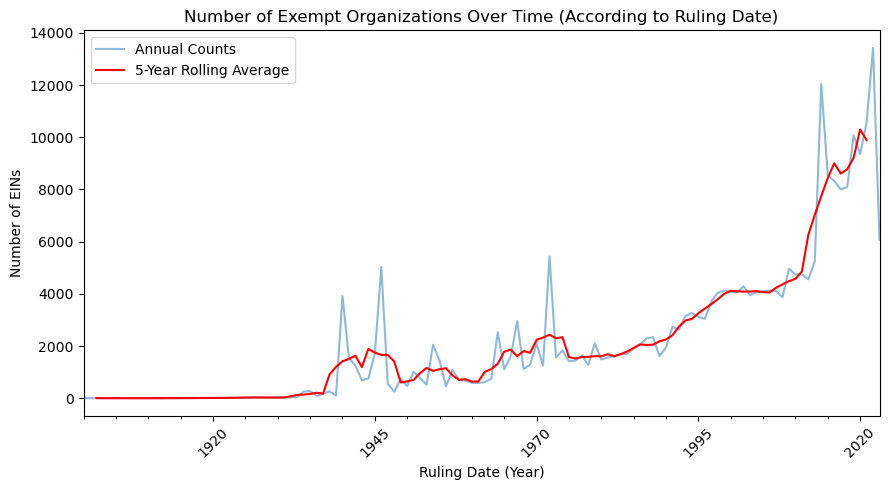

In [15]:
#| label: fig-ruling
#| fig-cap: "Trend Analysis of Ruling Dates for Exempt Organizations"

# Make data copy
ruling_df = df_reg_giv_irs_eo1.copy() 

# Calculate percentage of zeros in RULING col.
pct_of_zeros = ruling_df['ruling'].value_counts().get(0,0)/ruling_df.shape[0]
#print(f"{pct_of_zeros:.2%}")

# Aggregate data anually.
annual_counts = ruling_df.groupby(pd.Grouper(key='ruling', freq='Y')).size()

# Apply rolling window of 5 years to smooth the data
rolling_counts = annual_counts.rolling(window=5, center=True).mean()

# Plot
plt.figure(figsize=(9, 5))
annual_counts.plot(alpha=0.5, label='Annual Counts')  # Original data
rolling_counts.plot(color='red', label='5-Year Rolling Average')  # Smoothed data
plt.title('Number of Exempt Organizations Over Time (According to Ruling Date)')
plt.xlabel('Ruling Date (Year)')
plt.ylabel('Number of EINs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.4 Financial Analysis
This section aims to analyze financial metrics like asset, income and revenue to gauge the size and financial health of organizations. This can help in undertanding how much resources are available for and allocated towards their cause.

Classification codes provide a range view of the organization's assets and income, useful for categorizing organizations by financial size. These may provide a more coherent view of financials. 

### 4.4.1. Asset, Income & Revenue Amounts 

Data Values Note: 
Some values are negative. Documentation confirmed this is a possibility but lacks formal interpretation - https://www.irs.gov/pub/irs-soi/eo-info.pdf

In [16]:
# Select financial columns.
financial_columns = ['asset_amt', 'income_amt', 'revenue_amt']

# Show stats.
display(Markdown(f"Financial Amount Summary Stats:"))
df_reg_giv_irs_eo1[financial_columns].describe()

Financial Amount Summary Stats:

,asset_amt,income_amt,revenue_amt
count,"214,706.00","214,706.00","190,912.00"
mean,"8,412,815.72","4,918,212.63","3,663,787.81"
std,"284,811,159.26","151,694,731.50","99,541,115.77"
min,0.00,"-1,753,425.00","-46,780,468.00"
25%,0.00,0.00,0.00
50%,"5,989.00","3,000.00",0.00
75%,"380,038.25","206,526.00","145,756.25"
max,"54,599,818,948.00","42,081,770,632.00","19,858,151,933.00"


### 4.4.2. Asset & Income Codes

**Action item:** find documentation that maps asset and income codes. 

In [17]:
# Select financial code columns.
financial_columns = ['asset_cd', 'income_cd']

# Show stats.
display(Markdown(f"Financial Code Summary Stats:"))
df_reg_giv_irs_eo1[financial_columns].describe()

Financial Code Summary Stats:

,asset_cd,income_cd
count,"267,136.00","267,136.00"
mean,1.95,1.79
std,2.56,2.37
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,4.00,4.00
max,9.00,9.00


## 4.5 Transparency and Accountability
Codes within the dataset such as filing_req_cd and pf_filing_req_cd may indicate the filing requirements, which can help assess compliance with IRS reporting standards, a proxy for transparency.

TAX_PERIOD, ACCT_PD: Reviewing the tax period and accounting period using tax_period and acct_pd columns may offer insights into the timeliness and regularity of financial reporting.

**Action item:** find documentation that maps filing_req_cd, pf_filing_req_cd, and acct_pd codes. 

In [21]:
# Select filing columns.
filing_columns = ['filing_req_cd', 'pf_filing_req_cd','tax_period', 'acct_pd']

# Show stats.
display(Markdown(f"Tax Filing Code Summary Stats:"))
df_reg_giv_irs_eo1[filing_columns].describe()

Tax Filing Code Summary Stats:

,filing_req_cd,pf_filing_req_cd,tax_period,acct_pd
count,"267,136.00","267,136.00",217065,"267,136.00"
mean,2.12,0.10,2022-03-02 17:30:47.938636544,10.13
min,0.00,0.00,1988-12-01 00:00:00,0.00
25%,1.00,0.00,2021-12-01 00:00:00,8.00
50%,2.00,0.00,2022-06-01 00:00:00,12.00
75%,2.00,0.00,2022-12-01 00:00:00,12.00
max,14.00,3.00,2023-06-01 00:00:00,12.00
std,1.88,0.30,NaN,2.91
